In [168]:
import numpy as np
import matplotlib.pyplot as plt

In [169]:
X=np.linspace(start=0.5,stop=4,num=10000)
y=np.power(X,3.0)
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [170]:
X=np.column_stack([np.power(X,3.0),X])

In [171]:
X

array([[  0.125     ,   0.5       ],
       [  0.12526271,   0.50035004],
       [  0.12552579,   0.50070007],
       ..., 
       [ 63.96640252,   3.99929993],
       [ 63.98319979,   3.99964996],
       [ 64.        ,   4.        ]])

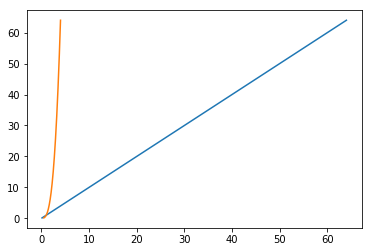

In [172]:
plt.plot(X,y)
plt.show()

In [173]:
def LR(X_train,X_test,y_train,y_test):
    from sklearn import linear_model
    clf = linear_model.LinearRegression()
    clf.fit(X_train, y_train)
    print_error(predict(clf,X_train),predict(clf,X_test),y_train,y_test,'LR')
    return clf

In [174]:
def ANN(X_train,X_test,y_train,y_test):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import np_utils
    m,input_layer_size=X_test.shape
    hidden_layer_size = input_layer_size   
    clf = Sequential()
    clf.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
    clf.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    clf.add(Dense(units = 1, kernel_initializer = 'normal'))
    clf.compile(loss='mean_squared_error', optimizer='adam')
    print("Shapes of y_test, y_prediction ",predict(clf,X_test).shape,y_test.shape)
    history=clf.fit(X_train, y_train, batch_size = 1000, epochs = 1000,verbose=1)
    print_error(predict(clf,X_train),predict(clf,X_test),y_train,y_test,'ANN')
    return clf

In [175]:
def split_test_train_val(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.1,random_state = 0)
    X_test, X_val,y_test,y_val =  train_test_split(X_test,y_test,test_size=0.1,random_state = 0)
    return X_train,X_test,X_val,y_train,y_test,y_val

In [176]:
def print_error(train,test,target_train,target_test,parameter):
    print("Mean squared error on training set using ",parameter,np.mean((train-target_train)**2))
    print("Mean squared error on test set using  ",parameter,np.mean((test-target_test)**2))

In [177]:
def plot_comparision(prediction,target,output):
    from sklearn import linear_model
    plt.plot(target,prediction,'.')
    plt.plot([0,np.max(target)],[0,np.max(target)],color='k', linestyle='-')
    plt.xlabel("Observation")
    plt.ylabel("Prediction")
    plt.savefig(output,bbox_inches='tight')
    plt.show()

In [178]:
def predict(clf, input_features):
    prediction=clf.predict(input_features).reshape(-1,1)
    return prediction

In [179]:
X_train,X_test,X_val,y_train,y_test,y_val=split_test_train_val(X,y)

Mean squared error on training set using  LR 6.67436079799e-27
Mean squared error on test set using   LR 6.7381419467e-27


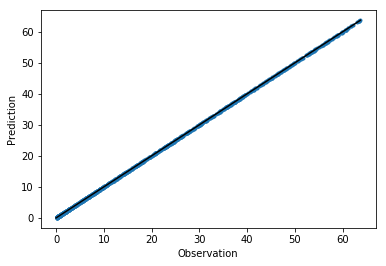

In [180]:
clf_LR=LR(X_train,X_test,y_train,y_test);
plot_comparision(predict(clf_LR,X_test),y_test,'test.pdf')

Shapes of y_test, y_prediction  (900, 1) (900, 1)
Epoch 1/1000
9000/9000 [==============================] - 0s - loss: 668.0879     
Epoch 2/1000
9000/9000 [==============================] - 0s - loss: 667.3207     
Epoch 3/1000
9000/9000 [==============================] - 0s - loss: 666.2021     
Epoch 4/1000
9000/9000 [==============================] - 0s - loss: 664.5273     
Epoch 5/1000
9000/9000 [==============================] - 0s - loss: 661.9780     
Epoch 6/1000
9000/9000 [==============================] - 0s - loss: 658.0288     
Epoch 7/1000
9000/9000 [==============================] - 0s - loss: 652.0627     
Epoch 8/1000
9000/9000 [==============================] - 0s - loss: 643.4802     
Epoch 9/1000
9000/9000 [==============================] - 0s - loss: 631.5994     
Epoch 10/1000
9000/9000 [==============================] - 0s - loss: 615.7355     
Epoch 11/1000
9000/9000 [==============================] - 0s - loss: 595.2828     
Epoch 12/1000
9000/9000 [==========

9000/9000 [==============================] - 0s - loss: 0.8862     
Epoch 100/1000
9000/9000 [==============================] - 0s - loss: 0.8657     
Epoch 101/1000
9000/9000 [==============================] - 0s - loss: 0.8457     
Epoch 102/1000
9000/9000 [==============================] - 0s - loss: 0.8260     
Epoch 103/1000
9000/9000 [==============================] - 0s - loss: 0.8065     
Epoch 104/1000
9000/9000 [==============================] - 0s - loss: 0.7874     
Epoch 105/1000
9000/9000 [==============================] - 0s - loss: 0.7685     
Epoch 106/1000
9000/9000 [==============================] - 0s - loss: 0.7501     
Epoch 107/1000
9000/9000 [==============================] - 0s - loss: 0.7319     
Epoch 108/1000
9000/9000 [==============================] - 0s - loss: 0.7140     
Epoch 109/1000
9000/9000 [==============================] - 0s - loss: 0.6965     
Epoch 110/1000
9000/9000 [==============================] - 0s - loss: 0.6792     
Epoch 111/1000
9000

9000/9000 [==============================] - 0s - loss: 0.0423     
Epoch 198/1000
9000/9000 [==============================] - 0s - loss: 0.0408     
Epoch 199/1000
9000/9000 [==============================] - 0s - loss: 0.0394     
Epoch 200/1000
9000/9000 [==============================] - 0s - loss: 0.0381     
Epoch 201/1000
9000/9000 [==============================] - 0s - loss: 0.0368     
Epoch 202/1000
9000/9000 [==============================] - 0s - loss: 0.0356     
Epoch 203/1000
9000/9000 [==============================] - 0s - loss: 0.0344     
Epoch 204/1000
9000/9000 [==============================] - 0s - loss: 0.0333     
Epoch 205/1000
9000/9000 [==============================] - 0s - loss: 0.0322     
Epoch 206/1000
9000/9000 [==============================] - 0s - loss: 0.0311     
Epoch 207/1000
9000/9000 [==============================] - 0s - loss: 0.0301     
Epoch 208/1000
9000/9000 [==============================] - 0s - loss: 0.0292     
Epoch 209/1000
9000

9000/9000 [==============================] - 0s - loss: 0.0080     
Epoch 296/1000
9000/9000 [==============================] - 0s - loss: 0.0080     
Epoch 297/1000
9000/9000 [==============================] - 0s - loss: 0.0079     
Epoch 298/1000
9000/9000 [==============================] - 0s - loss: 0.0079     
Epoch 299/1000
9000/9000 [==============================] - 0s - loss: 0.0079     
Epoch 300/1000
9000/9000 [==============================] - 0s - loss: 0.0079     
Epoch 301/1000
9000/9000 [==============================] - 0s - loss: 0.0078     
Epoch 302/1000
9000/9000 [==============================] - 0s - loss: 0.0078     
Epoch 303/1000
9000/9000 [==============================] - 0s - loss: 0.0078     
Epoch 304/1000
9000/9000 [==============================] - 0s - loss: 0.0078     
Epoch 305/1000
9000/9000 [==============================] - 0s - loss: 0.0078     
Epoch 306/1000
9000/9000 [==============================] - 0s - loss: 0.0077     
Epoch 307/1000
9000

9000/9000 [==============================] - 0s - loss: 0.0061     
Epoch 394/1000
9000/9000 [==============================] - 0s - loss: 0.0061     
Epoch 395/1000
9000/9000 [==============================] - 0s - loss: 0.0061     
Epoch 396/1000
9000/9000 [==============================] - 0s - loss: 0.0061     
Epoch 397/1000
9000/9000 [==============================] - 0s - loss: 0.0060     
Epoch 398/1000
9000/9000 [==============================] - 0s - loss: 0.0060     
Epoch 399/1000
9000/9000 [==============================] - 0s - loss: 0.0060     
Epoch 400/1000
9000/9000 [==============================] - 0s - loss: 0.0060     
Epoch 401/1000
9000/9000 [==============================] - 0s - loss: 0.0060     
Epoch 402/1000
9000/9000 [==============================] - 0s - loss: 0.0059     
Epoch 403/1000
9000/9000 [==============================] - 0s - loss: 0.0059     
Epoch 404/1000
9000/9000 [==============================] - 0s - loss: 0.0059     
Epoch 405/1000
9000

9000/9000 [==============================] - 0s - loss: 0.0040     
Epoch 492/1000
9000/9000 [==============================] - 0s - loss: 0.0040     
Epoch 493/1000
9000/9000 [==============================] - 0s - loss: 0.0040     
Epoch 494/1000
9000/9000 [==============================] - 0s - loss: 0.0040     
Epoch 495/1000
9000/9000 [==============================] - 0s - loss: 0.0039     
Epoch 496/1000
9000/9000 [==============================] - 0s - loss: 0.0039     
Epoch 497/1000
9000/9000 [==============================] - 0s - loss: 0.0039     
Epoch 498/1000
9000/9000 [==============================] - 0s - loss: 0.0039     
Epoch 499/1000
9000/9000 [==============================] - 0s - loss: 0.0039     
Epoch 500/1000
9000/9000 [==============================] - 0s - loss: 0.0038     
Epoch 501/1000
9000/9000 [==============================] - 0s - loss: 0.0038     
Epoch 502/1000
9000/9000 [==============================] - 0s - loss: 0.0038     
Epoch 503/1000
9000

9000/9000 [==============================] - 0s - loss: 0.0022     
Epoch 590/1000
9000/9000 [==============================] - 0s - loss: 0.0022     
Epoch 591/1000
9000/9000 [==============================] - 0s - loss: 0.0022     
Epoch 592/1000
9000/9000 [==============================] - 0s - loss: 0.0022     
Epoch 593/1000
9000/9000 [==============================] - 0s - loss: 0.0021     
Epoch 594/1000
9000/9000 [==============================] - 0s - loss: 0.0021     
Epoch 595/1000
9000/9000 [==============================] - 0s - loss: 0.0021     
Epoch 596/1000
9000/9000 [==============================] - 0s - loss: 0.0021     
Epoch 597/1000
9000/9000 [==============================] - 0s - loss: 0.0021     
Epoch 598/1000
9000/9000 [==============================] - 0s - loss: 0.0021     
Epoch 599/1000
9000/9000 [==============================] - 0s - loss: 0.0021     
Epoch 600/1000
9000/9000 [==============================] - 0s - loss: 0.0020     
Epoch 601/1000
9000

9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 688/1000
9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 689/1000
9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 690/1000
9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 691/1000
9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 692/1000
9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 693/1000
9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 694/1000
9000/9000 [==============================] - 0s - loss: 0.0011     
Epoch 695/1000
9000/9000 [==============================] - 0s - loss: 0.0010     
Epoch 696/1000
9000/9000 [==============================] - 0s - loss: 0.0010     
Epoch 697/1000
9000/9000 [==============================] - 0s - loss: 0.0010     
Epoch 698/1000
9000/9000 [==============================] - 0s - loss: 0.0010     
Epoch 699/1000
9000

9000/9000 [==============================] - 0s - loss: 6.0235e-04     
Epoch 782/1000
9000/9000 [==============================] - 0s - loss: 5.9847e-04     
Epoch 783/1000
9000/9000 [==============================] - 0s - loss: 5.9526e-04     
Epoch 784/1000
9000/9000 [==============================] - 0s - loss: 5.9253e-04     
Epoch 785/1000
9000/9000 [==============================] - 0s - loss: 5.8784e-04     
Epoch 786/1000
9000/9000 [==============================] - 0s - loss: 5.8394e-04     
Epoch 787/1000
9000/9000 [==============================] - 0s - loss: 5.8016e-04     
Epoch 788/1000
9000/9000 [==============================] - 0s - loss: 5.7637e-04     
Epoch 789/1000
9000/9000 [==============================] - 0s - loss: 5.7414e-04     
Epoch 790/1000
9000/9000 [==============================] - 0s - loss: 5.7068e-04     
Epoch 791/1000
9000/9000 [==============================] - 0s - loss: 5.6625e-04     
Epoch 792/1000
9000/9000 [==============================] 

9000/9000 [==============================] - 0s - loss: 3.2000e-04     
Epoch 876/1000
9000/9000 [==============================] - 0s - loss: 3.1754e-04     
Epoch 877/1000
9000/9000 [==============================] - 0s - loss: 3.1531e-04     
Epoch 878/1000
9000/9000 [==============================] - 0s - loss: 3.1386e-04     
Epoch 879/1000
9000/9000 [==============================] - 0s - loss: 3.1173e-04     
Epoch 880/1000
9000/9000 [==============================] - 0s - loss: 3.0885e-04     
Epoch 881/1000
9000/9000 [==============================] - 0s - loss: 3.0686e-04     
Epoch 882/1000
9000/9000 [==============================] - 0s - loss: 3.0459e-04     
Epoch 883/1000
9000/9000 [==============================] - 0s - loss: 3.0162e-04     
Epoch 884/1000
9000/9000 [==============================] - 0s - loss: 2.9919e-04     
Epoch 885/1000
9000/9000 [==============================] - 0s - loss: 2.9714e-04     
Epoch 886/1000
9000/9000 [==============================] 

9000/9000 [==============================] - 0s - loss: 1.4900e-04     
Epoch 970/1000
9000/9000 [==============================] - 0s - loss: 1.4772e-04     
Epoch 971/1000
9000/9000 [==============================] - 0s - loss: 1.4644e-04     
Epoch 972/1000
9000/9000 [==============================] - 0s - loss: 1.4499e-04     
Epoch 973/1000
9000/9000 [==============================] - 0s - loss: 1.4413e-04     
Epoch 974/1000
9000/9000 [==============================] - 0s - loss: 1.4272e-04     
Epoch 975/1000
9000/9000 [==============================] - 0s - loss: 1.4112e-04     
Epoch 976/1000
9000/9000 [==============================] - 0s - loss: 1.3983e-04     
Epoch 977/1000
9000/9000 [==============================] - 0s - loss: 1.3855e-04     
Epoch 978/1000
9000/9000 [==============================] - 0s - loss: 1.3720e-04     
Epoch 979/1000
9000/9000 [==============================] - 0s - loss: 1.3595e-04     
Epoch 980/1000
9000/9000 [==============================] 

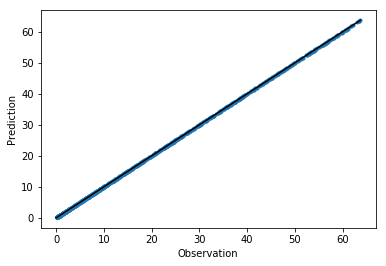

In [181]:
clf_ANN=ANN(X_train,X_test,y_train,y_test);
plot_comparision(predict(clf_ANN,X_test),y_test,'test.pdf')